# IMPORTING LIBRARIES

In [42]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

 # LOADING THE DATASET

In [5]:
# train data
train=pd.read_excel('flight_train.xlsx')


In [32]:
# test data
test=pd.read_excel('flight_test.xlsx')


In [6]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train.shape

(10683, 11)

10683 rows and 11 columns.

# CHECKING NULL VALUES

In [8]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

we have 1 missing values in Route column and Total Stops column.

# CHECKING DATATYPES 

In [9]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

1 integer type column and remaining all is object data type column.

# VISUALIZATION OF DATAFRAME

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


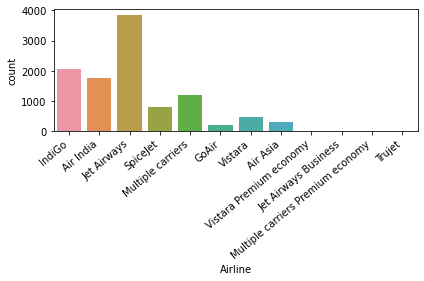

In [11]:
ax=sns.countplot(x='Airline',data=train)
print(train['Airline'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Jet airways has maximum number that is 3849.

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


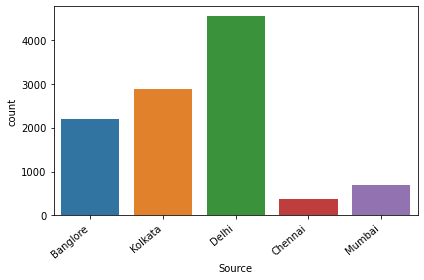

In [14]:
ax=sns.countplot(x='Source',data=train)
print(train['Source'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

delhi is indiacting maximum numbers.

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


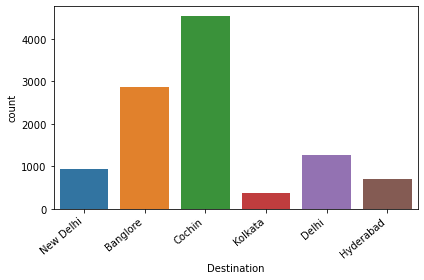

In [16]:
ax=sns.countplot(x='Destination',data=train)
print(train['Destination'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Cochin is showing maximum numbers.

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


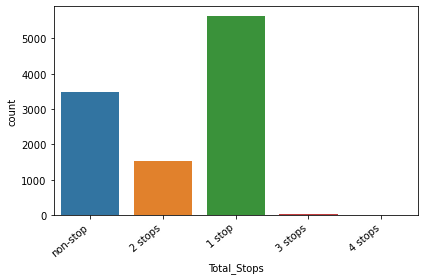

In [18]:
ax=sns.countplot(x='Total_Stops',data=train)
print(train['Total_Stops'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Flights having 1 stop is maximum 5625.

<AxesSubplot:xlabel='Price', ylabel='Density'>

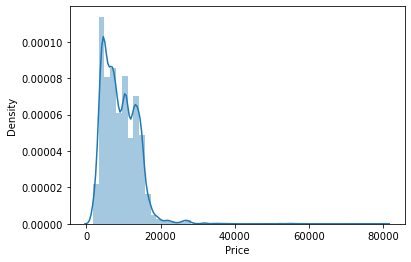

In [22]:
sns.distplot(train['Price'])

Price is the target column looking left skewed.

# DROPPING UNNECESARY COLUMN

In [24]:
del train['Route']

In [25]:
del train['Additional_Info']

In [26]:
train.shape

(10683, 9)

after deleting of 2 columns ,9 columns is remaining.

# CONVERTING OBJECT COLUMN INTO NUMERIC COLUMN

In [27]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in train.columns:    
        if train[i].dtypes=='object':
            train[i]=enc.fit_transform(train[i])
            

# STATISTICAL SUMMARY.

In [29]:
train.describe()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,107.980717,869.828419,194.069269,1.458579,9087.064121
std,2.352155,12.337763,1.177221,1.474782,61.085563,331.509504,108.620556,1.806560,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,55.000000,603.000000,106.000000,0.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,96.000000,937.000000,233.000000,0.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,164.000000,1141.000000,280.000000,4.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,221.000000,1342.000000,367.000000,5.000000,79512.000000


count is same for all the columns.

Mean and median(50%) is almost equall in every columns.

There is not much difference between 75% and max in any column

# CORRELTION MATRIX

<AxesSubplot:>

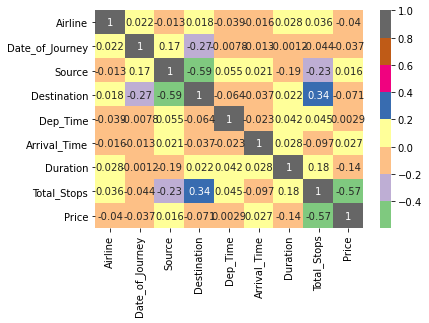

In [31]:
sns.heatmap(train.corr(),annot=True,cmap='Accent')

Total_Stops is showing positive correlation with price column.

Arrival_hour is negatively correlated with Arrival_min.

Arrival_min is negatively correlated with Total_STops.

Journey_Day and Journey_month is showing negative correlation with price column

# SEPRATING THE COLUMNS INTO X AND Y

In [34]:
x=train.drop('Price', axis=1)
y=train['Price']

# STANDARD SCALING

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(train)

x=pd.DataFrame(x,columns=train.columns)

# TEST DATA

In [37]:
test.shape

(2671, 10)

2671 rows and 10 columns.

In [38]:
# dropping unnnecessary column from the test data
del test['Route']
del test['Additional_Info']

# TRAIN TEST SPLIT

In [40]:

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.25, random_state=48)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8012, 9)
(2671, 9)
(8012,)
(2671,)


# MODEL BUILDING

In [43]:



#for Linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 1.0
error
mean absolute error 3.346504653322478e-12
mean squared error 1.957980795509271e-23
root mean squared error 4.42490767757845e-12


In [44]:
# Cross validation Linear Regression
scr=cross_val_score(lr,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 1.0


In [45]:


#For Ridge

rd=Ridge()

rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))



r2 score 0.9999999728765645
error
mean absolute error 0.5428626462308705
mean squared error 0.6408200672442023
root mean squared error 0.8005123779456519


In [46]:
# For Ridge (cross  validation)


score=cross_val_score(rd,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9999999832948558


In [47]:
# for Lasso

ls=Lasso()

ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.9999999492483039
error
mean absolute error 0.8317941335141374
mean squared error 1.199062899576766
root mean squared error 1.0950173056060648


In [48]:
# For Lasso (cross validation)


score=cross_val_score(ls,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.999999952897116


In [49]:

#For ElasticNet



en=ElasticNet()

en.fit(x_train,y_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.8825107167704286
error
mean absolute error 1167.6200643936852
mean squared error 2775809.5118184756
root mean squared error 1666.0760822418872


In [50]:


#For ElasticNet (cross validation)

score=cross_val_score(en,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.8928788018424904


Our every model is predicting well , we are getting 100% r2 score in Linear Regression and 99% r2 score in ridge.

# ENSEMBLE TECHNIQUE

In [51]:

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [52]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score',rfc*100)

r2 score: 99.20503744659305
cross val score 99.75347424473371


# SAVING

In [53]:
import pickle
filename='flight_fares.pkl'
pickle.dump(rf, open(filename,'wb'))

In [55]:
loaded_model=pickle.load(open('flight_fares.pkl','rb'))
result=loaded_model.score(x_test, y_test)
print(result)

0.9920503744659306


In [57]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion
                

,0,1,2,3,4,5,6,7,8,9,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670
predicted,4174.0,25690.05,7297.88,12898.0,6068.76,7647.98,13081.68,12819.0,11019.17,14151.0,...,6810.77,6961.0,14231.0,10972.87,15969.36,6985.54,7927.57,10918.88,7006.61,13029.0
original,4174.0,25690.05,7297.88,12898.0,6068.76,7647.98,13081.68,12819.0,11019.17,14151.0,...,6810.77,6961.0,14231.0,10972.87,15969.36,6985.54,7927.57,10918.88,7006.61,13029.0


# PREDICTING ON TEST DATA

In [58]:
y_prediction=ls.predict(x_test)

In [59]:
r2_score(y_test,y_prediction)

0.9999999492483039

In [60]:
result=pd.DataFrame()


result["Fare"]=y_prediction
result=result.sort_index()
result.to_csv('flight_fares.csv',index=True)

In [61]:
# Now Loding the data
ds=pd.read_csv('flight_fares.csv')
ds

,Unnamed: 0,Fare
0,0,4175.101169
1,1,25731.244834
2,2,7298.397528
3,3,12897.136201
4,4,6069.674345
...,...,...
2666,2666,6985.468028
2667,2667,7927.255854
2668,2668,10918.581945
2669,2669,7013.461721
